In [1]:
#!/usr/bin/python
# by DBR 2/2017 #

%matplotlib inline  
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

from all_models import *


In [4]:
#from average values in paper 
aS = 125;   #constant growth rate of susceptibles [cells/uL/day]
dS = 0.47;   #susceptible death rate [1/day] 
Bt = 1e-4;  #infectivity [cells/virion-day]
dI = 1;     #infected death rate [1/day]
k  = 0.3;  #immune cell killing rate [1/day]
w  = 1.6;     #immune cell multiplier [1/day]
aE = 1e-4;   #initial E cell concentration [cells/uL]
dE = 0.002;  #immune death rate [1/day]
E50 = 260;   #50 pct max E cell concentration [cells/uL]
tau= 0.05   #productively infected probability
p  = 5e4    #leak+burst viral production rate [virions/cell]
g  = 23      #viral clearance [1/day]
 
#initial conditions
U0=0; 
P0=0;
V0=0.03;    
S0=600; 
E0=1.2;       


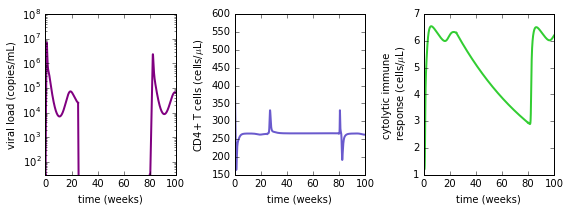

In [5]:
#simulating the whole trajectory given the ART intervention etc

t1=np.linspace(0,25*7,1e3) #week timeseries
t2=np.linspace(25*7,80*7,1e3) #week timeseries
t3=np.linspace(80*7,100*7,1e3) #week timeseries

#change this part accordingly for which model one wants to simulate
sol1=odeint(model_1, [S0,U0,P0,E0,V0], t1, 
           (aS,dS,Bt,tau,dI,dI,k,aE,dE,E50,w,p,g), mxstep=1000)
sol2=odeint(model_1, [sol1[-1,0],sol1[-1,1],sol1[-1,2],sol1[-1,3],sol1[-1,4]], t2, 
           (aS,dS,Bt/10,tau,dI,dI,k,aE,dE,E50,w,p,g), mxstep=1000)
sol3=odeint(model_1, [sol2[-1,0],0,0,sol2[-1,3],0.03], t3, 
           (aS,dS,Bt,tau,dI,dI,k,aE,dE,E50,w,p,g), mxstep=1000)

#viral load CD4 and CD8
plt.figure(figsize=(8,3),dpi=600)
plt.subplot(131)
plt.semilogy(t1/7,sol1[:,4]*1e3,color='purple',lw=2)
plt.semilogy(t2/7,sol2[:,4]*1e3,color='purple',lw=2)
plt.semilogy(t3/7,sol3[:,4]*1e3,color='purple',lw=2)
plt.ylim(30,1e8)
plt.ylabel('viral load (copies/mL)')
plt.xlabel('time (weeks)')
plt.tight_layout()
plt.subplot(132)
plt.plot(t1/7,sol1[:,0]+sol1[:,1]+sol1[:,2],color='slateblue',lw=2); #plt.plot(t1/7,sol1[:,1],color='tan'); plt.plot(t1/7,sol1[:,2],color='firebrick')
plt.plot(t2/7,sol2[:,0]+sol1[:,1]+sol1[:,2],color='slateblue',lw=2); #plt.plot(t1/7,sol2[:,1],color='tan'); plt.plot(t1/7,sol2[:,2],color='firebrick')
plt.plot(t3/7,sol3[:,0]+sol1[:,1]+sol1[:,2],color='slateblue',lw=2); #plt.plot(t1/7,sol3[:,1],color='tan'); plt.plot(t1/7,sol3[:,2],color='firebrick')
#plt.legend(['S','U','P'])
plt.ylabel('CD4+ T cells (cells/$\mu$L)')
plt.xlabel('time (weeks)')
plt.subplot(133)
plt.plot(t1/7,sol1[:,3],color='limegreen',lw=2)
plt.plot(t2/7,sol2[:,3],color='limegreen',lw=2)
plt.plot(t3/7,sol3[:,3],color='limegreen',lw=2)
plt.ylabel('cytolytic immune \n response (cells/$\mu$L)')
plt.xlabel('time (weeks)')
plt.tight_layout()

plt.savefig('figures/sim_play1.pdf')